<a href="https://colab.research.google.com/github/Sinha123456/Kaggle_projects/blob/master/bankchurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd/gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive'
/


In [1]:
#this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

#We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers. I download that dataset from the Kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd

#read and display the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle_dataset/BankChurners.csv')
df.head(5)
# data=pd.DataFrame(data)
# print(data.head())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
!git clone https://github.com/Sinha123456/projects_jupyter.git

Cloning into 'projects_jupyter'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
 df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis = 1, inplace = True)

In [ ]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis =1, inplace = True)

In [ ]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.notna().sum()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [ ]:
def change_value(value):
    change = value.replace('K', '')
    if '$' in change:
        change = (change.replace('$', ''))
    if 'Less than' in change:
        change = (change.replace('Less than','30-'))
    if 'Unknown' in change:
        change = (change.replace('Unknown', '0'))
    return change
df['Income_Category'] = df['Income_Category'].apply(lambda x: change_value(x))

In [ ]:
pd.value_counts(df['Attrition_Flag'])

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

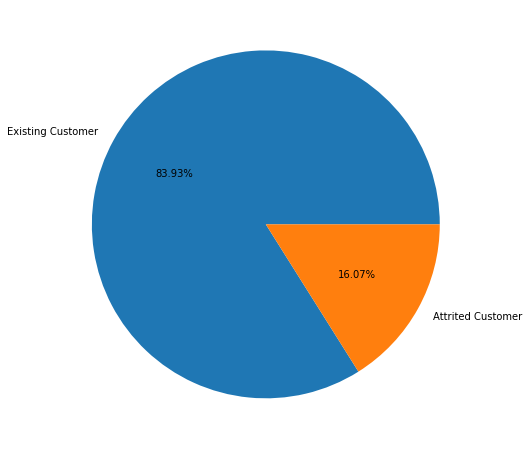

In [ ]:
churn = pd.value_counts(df['Attrition_Flag']).tolist()
labels = ['Existing Customer', 'Attrited Customer']
plt.figure(figsize=(17,8))
plt.pie(x = churn, labels = labels, autopct = '%.2f%%')
plt.show()

In [ ]:
df['Education_Level'].tolist()

['High School',
 'Graduate',
 'Graduate',
 'High School',
 'Uneducated',
 'Graduate',
 'Unknown',
 'High School',
 'Uneducated',
 'Graduate',
 'Uneducated',
 'Unknown',
 'College',
 'Graduate',
 'Graduate',
 'Unknown',
 'Post-Graduate',
 'Unknown',
 'High School',
 'Graduate',
 'Doctorate',
 'Graduate',
 'High School',
 'Unknown',
 'Unknown',
 'Graduate',
 'High School',
 'Unknown',
 'Uneducated',
 'High School',
 'Unknown',
 'Uneducated',
 'Graduate',
 'College',
 'Graduate',
 'College',
 'Graduate',
 'High School',
 'Graduate',
 'Doctorate',
 'Graduate',
 'Unknown',
 'College',
 'High School',
 'Graduate',
 'Uneducated',
 'Doctorate',
 'Doctorate',
 'High School',
 'College',
 'Unknown',
 'Graduate',
 'High School',
 'Unknown',
 'Graduate',
 'Graduate',
 'Graduate',
 'Uneducated',
 'Graduate',
 'High School',
 'Unknown',
 'Graduate',
 'High School',
 'Post-Graduate',
 'High School',
 'Uneducated',
 'College',
 'Uneducated',
 'Graduate',
 'Doctorate',
 'Graduate',
 'Graduate',
 'Gradu

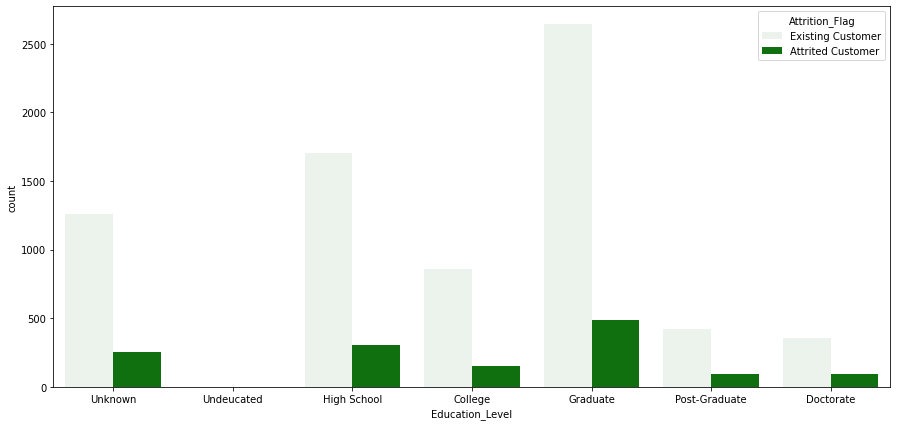

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.countplot(x = df['Education_Level'], hue = 'Attrition_Flag', order = ['Unknown', 'Undeucated', 'High School', 'College', 'Graduate', 'Post-Graduate','Doctorate'],
              data = df, color = 'g')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


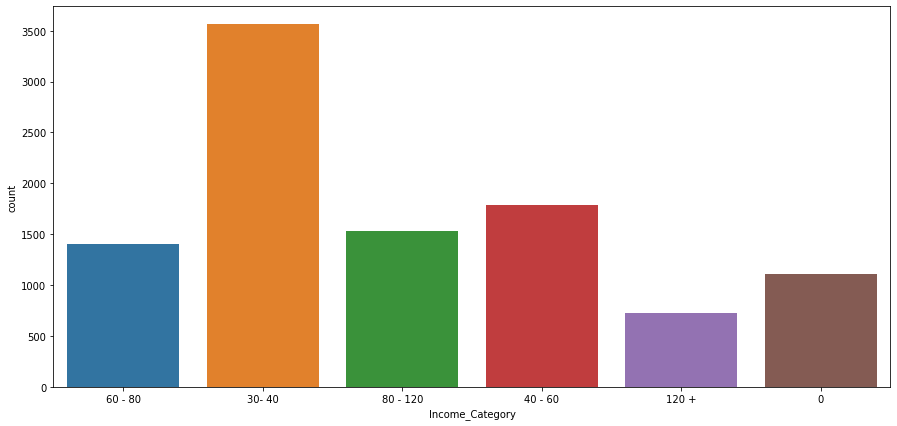

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot( 'Income_Category', data = df)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


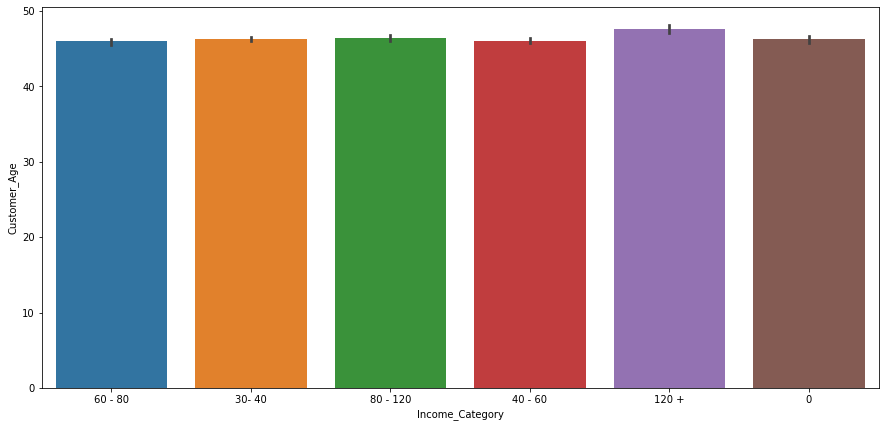

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(df['Income_Category'], df['Customer_Age'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


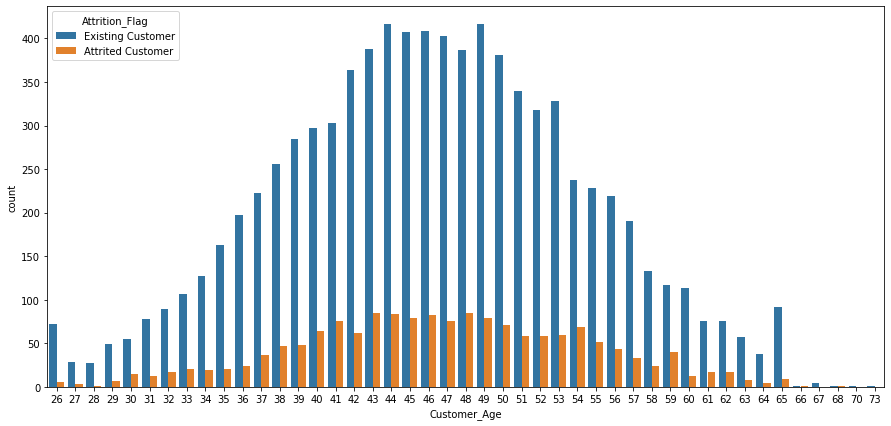

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['Customer_Age'], hue = df['Attrition_Flag'])
plt.show()

([<matplotlib.patches.Wedge at 0x7ff06a1fb6d8>,
 [Text(0.11039790437095814, 1.0944461168602595, "('Married',)"),
  Text(-0.5856287072355493, -0.931149299125344, "('Single',)"),
  Text(0.8483414350283534, -0.7002262560158926, "('Unknown',)"),
  Text(1.0712454172243213, -0.24986647649472635, "('Divorced',)")],
 [Text(0.06021703874779535, 0.5969706091965051, '46.80%'),
  Text(-0.31943384031029953, -0.5078996177047331, '38.53%'),
  Text(0.4627316918336472, -0.38194159419048684, '7.38%'),
  Text(0.5843156821223571, -0.1362908053607598, '7.29%')])

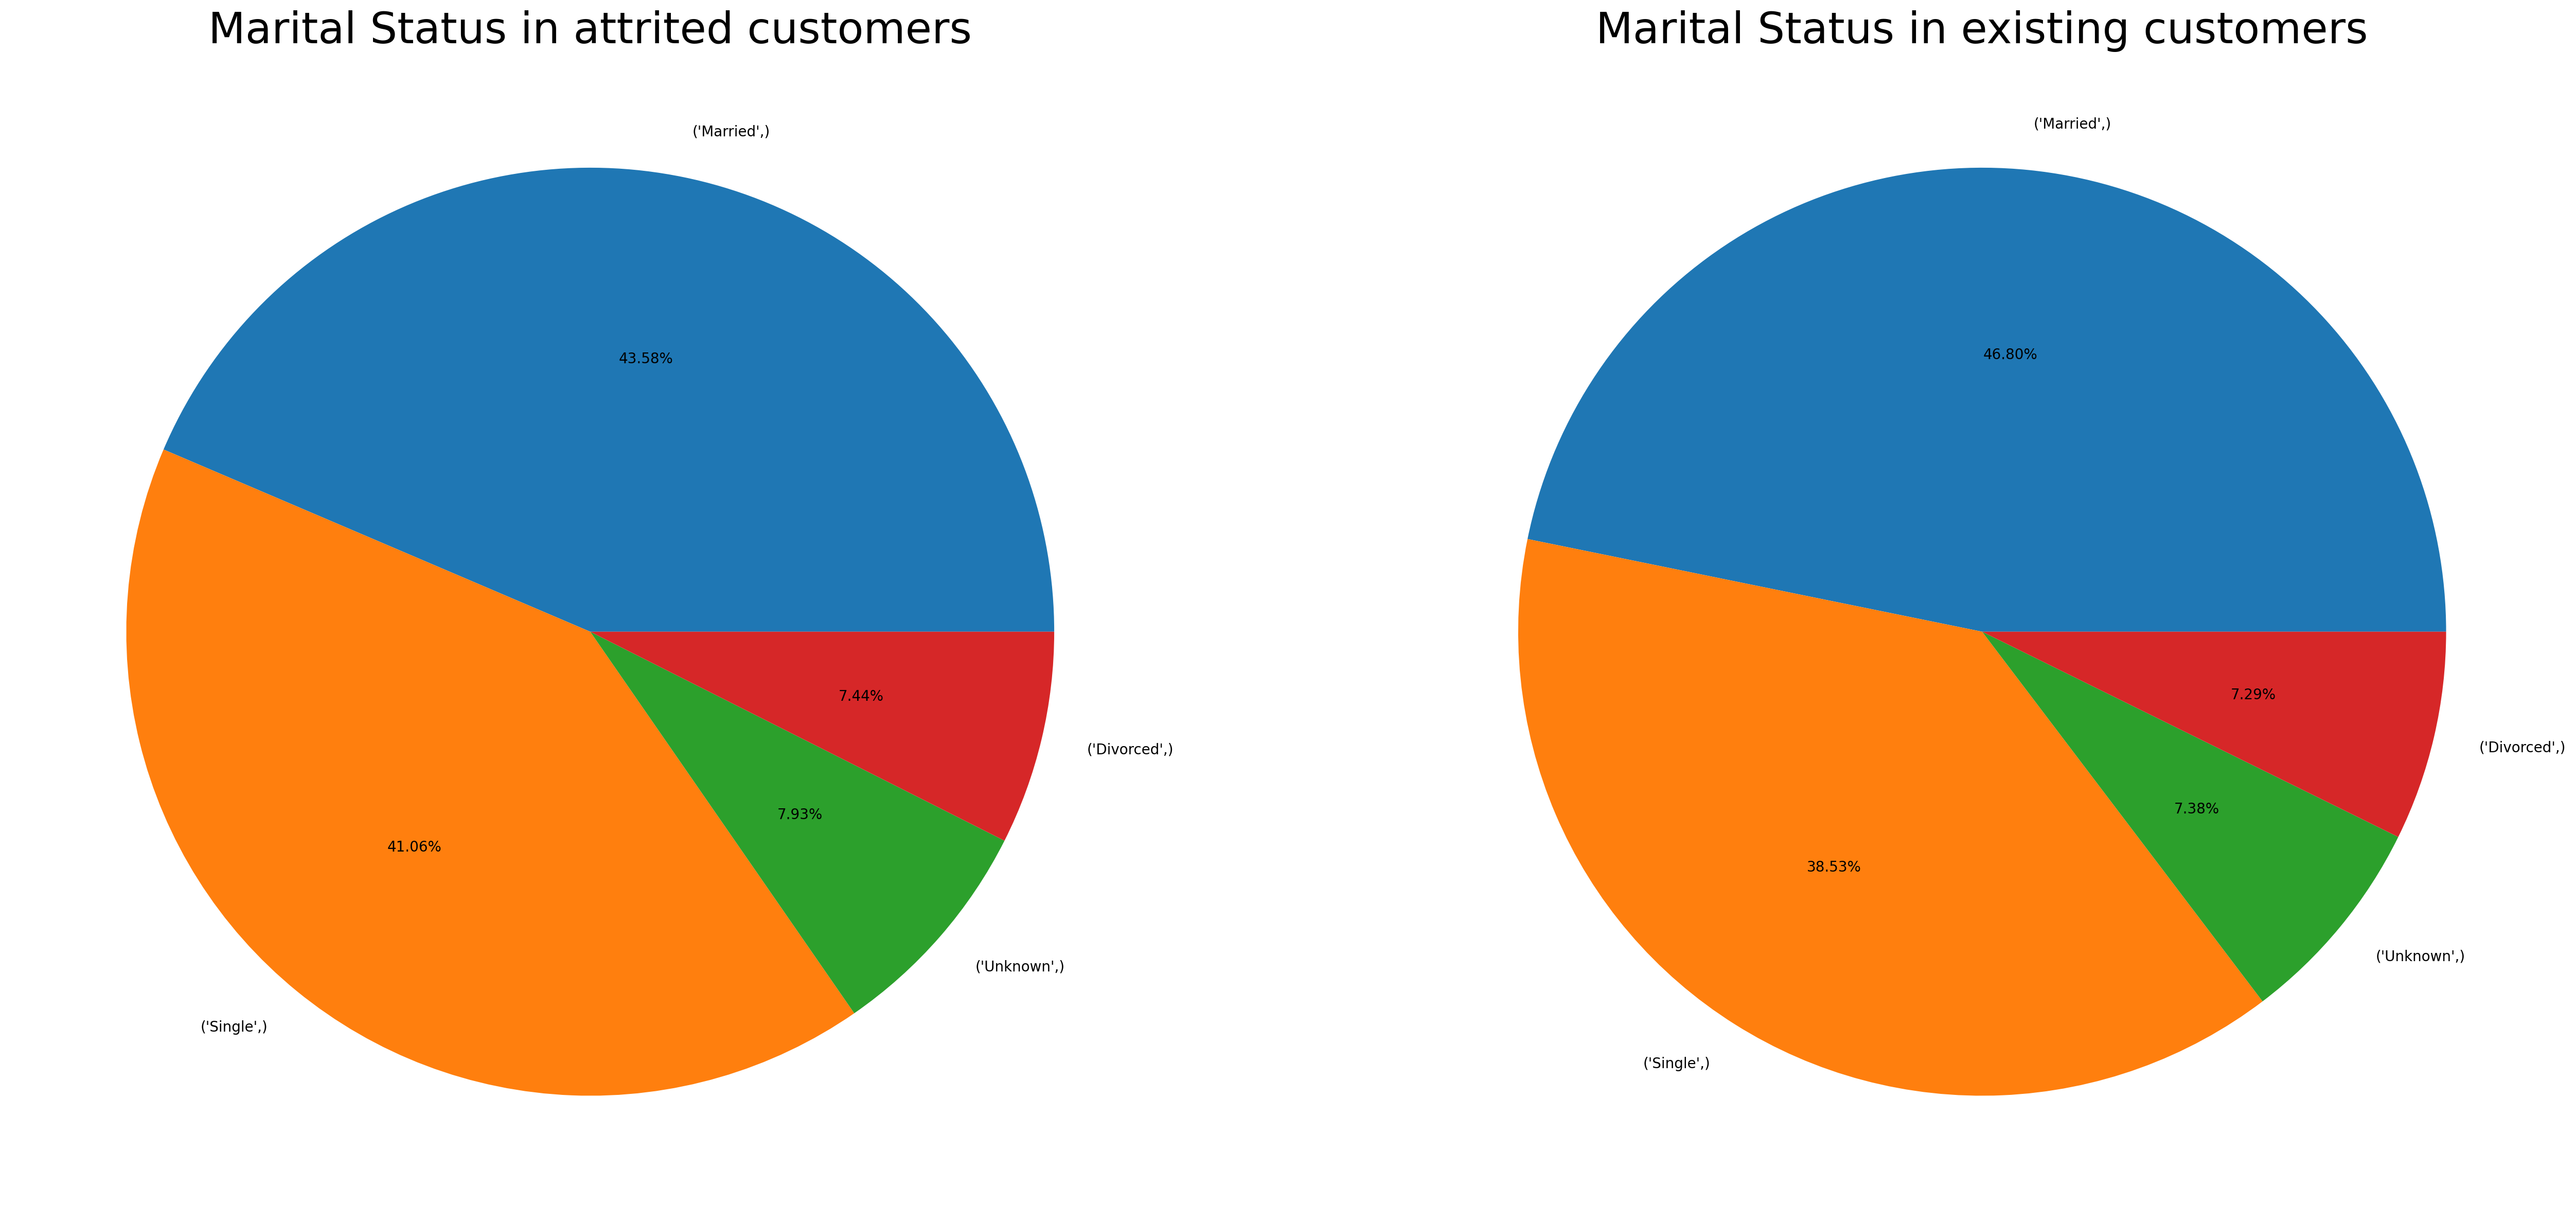

In [ ]:
marital_count = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts()
marital_attrited = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
marital_existing = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (32,18))
ax[0].set_title("Marital Status in attrited customers", fontsize = 30)
ax[0].pie(x = marital_attrited , autopct='%.2f%%', labels = marital_count.index)
ax[1].set_title("Marital Status in existing customers", fontsize = 30)
ax[1].pie(x = marital_existing, autopct='%.2f%%', labels = marital_count.index)

([<matplotlib.patches.Wedge at 0x7ff05ded3240>,
 [Text(0.6162726886888834, 0.9111574908742038, "('Graduate',)"),
  Text(-0.9328768014299642, 0.5828729478658272, "('High School',)"),
  Text(-0.9439062217682512, -0.564837184069166, "('Unknown',)"),
  Text(-0.11282467086602758, -1.0941986079519443, "('Uneducated',)"),
  Text(0.688876872023183, -0.8575830310771986, "('College',)"),
  Text(1.0044585550129046, -0.44840050319038244, "('Doctorate',)"),
  Text(1.0904918109277202, -0.14431774076523463, "('Post-Graduate',)")],
 [Text(0.33614873928484545, 0.49699499502229294, '31.07%'),
  Text(-0.5088418916890713, 0.3179306988359057, '20.08%'),
  Text(-0.5148579391463188, -0.30809300949227236, '14.86%'),
  Text(-0.061540729563287766, -0.5968356043374241, '14.71%'),
  Text(0.37575102110355435, -0.4677725624057446, '10.11%'),
  Text(0.5478864845524933, -0.24458209264929948, '4.99%'),
  Text(0.5948137150514836, -0.07871876769012798, '4.19%')])

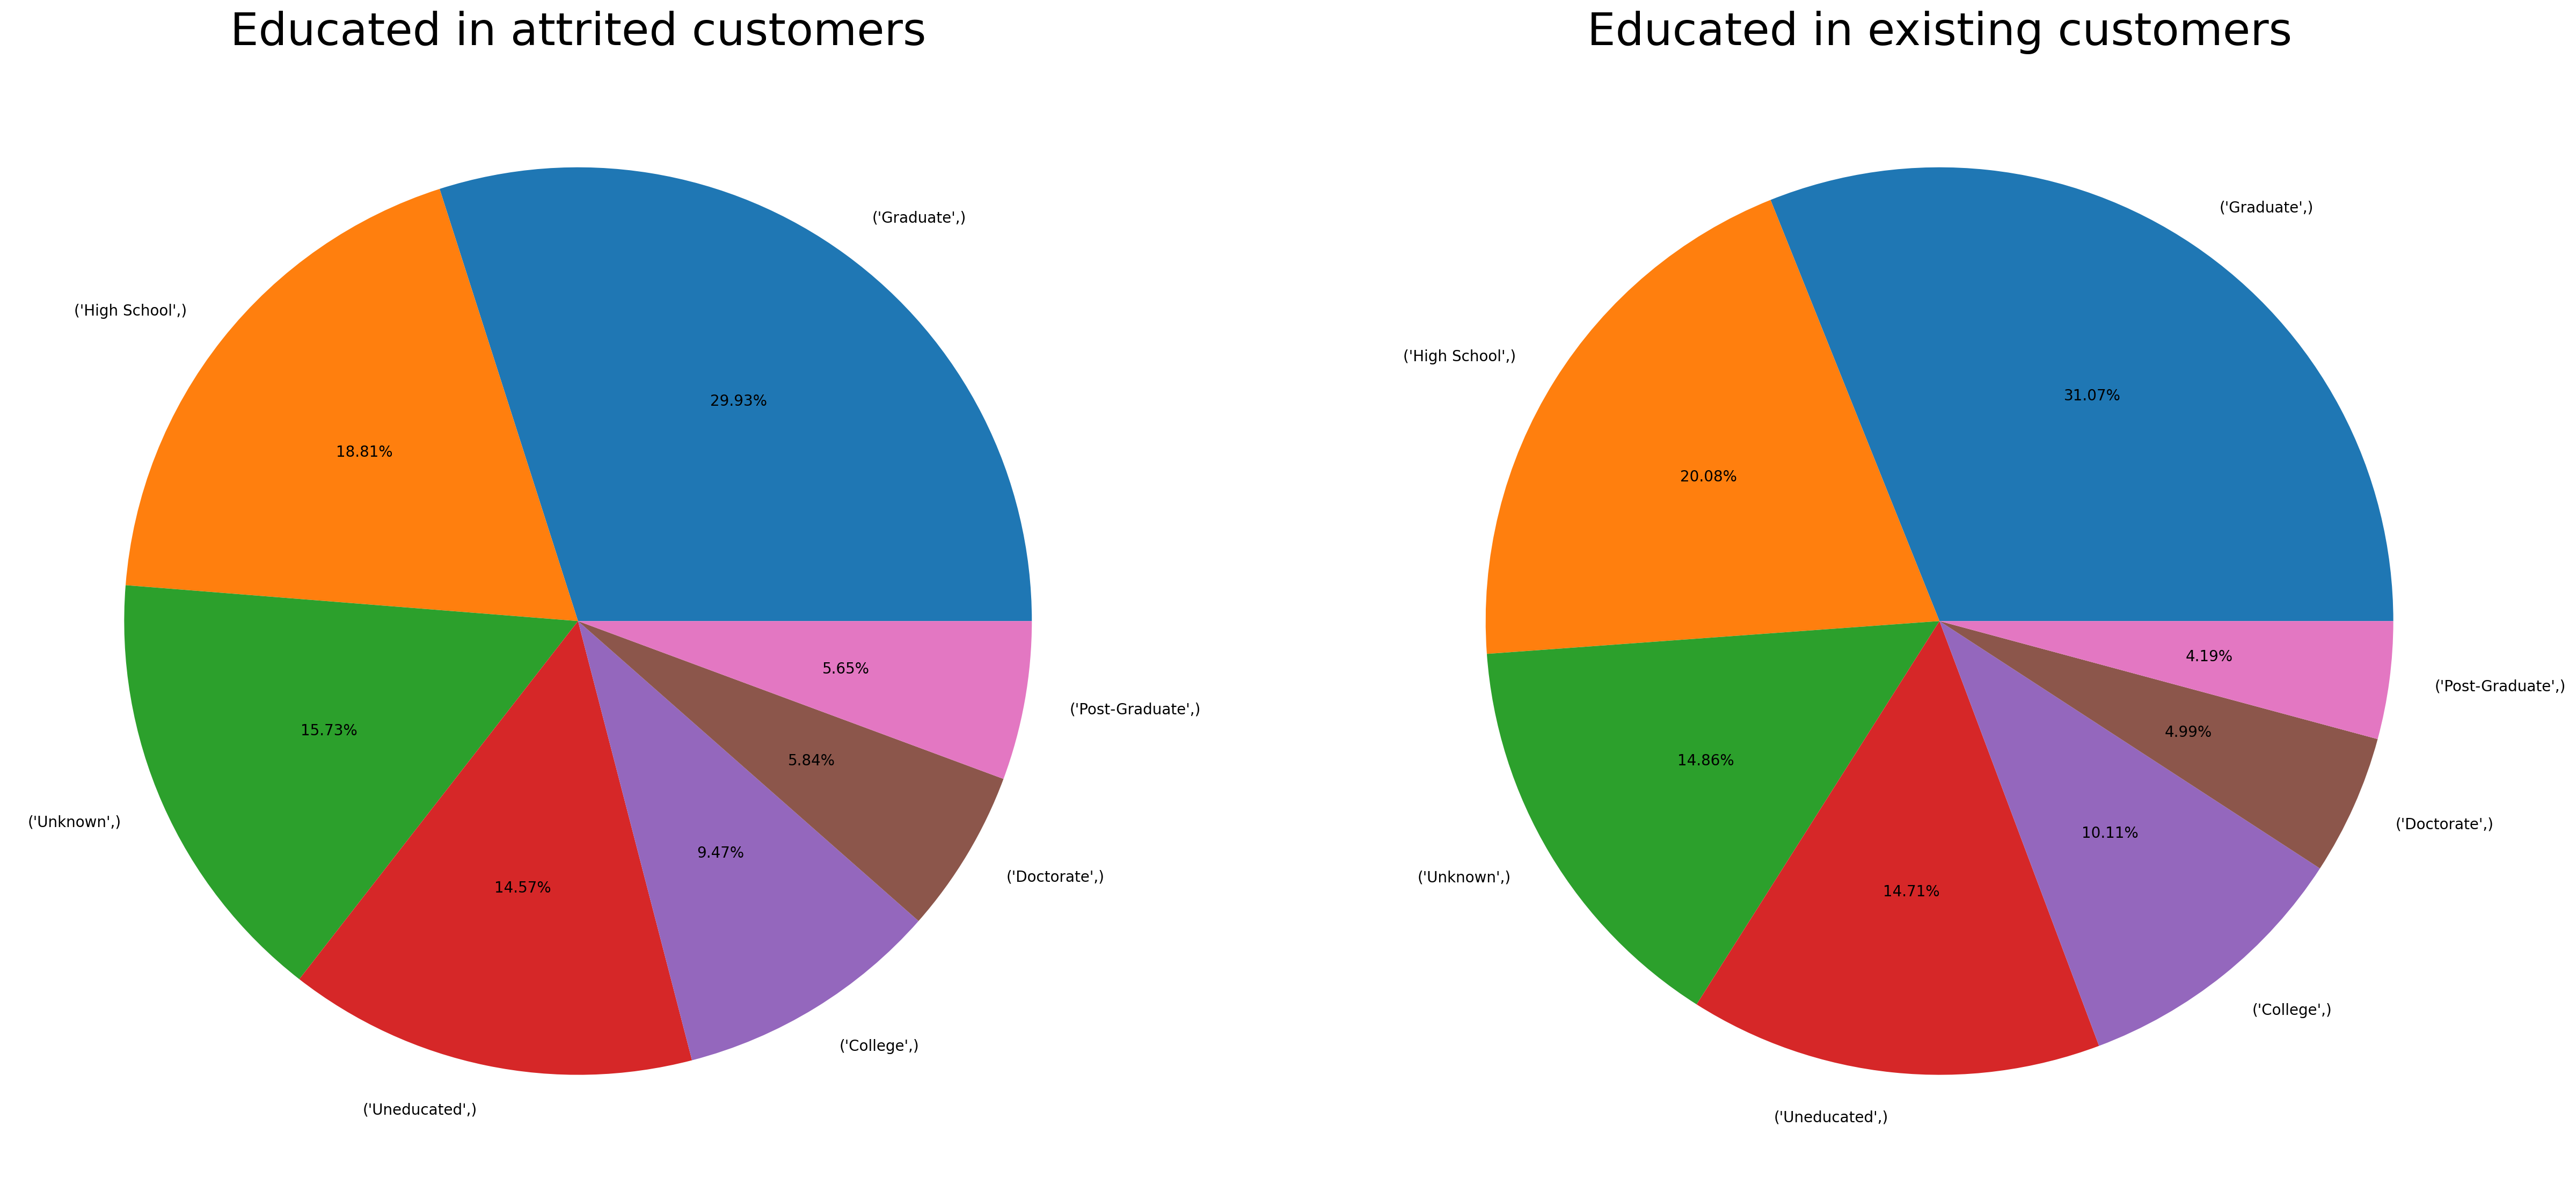

In [ ]:
education_count = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts()
educated_attrited = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
educated_existing = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (30,15))
ax[0].set_title("Educated in attrited customers", fontsize = 30)
ax[0].pie(x = educated_attrited , autopct='%.2f%%', labels = education_count.index)
ax[1].set_title("Educated in existing customers", fontsize = 30)
ax[1].pie(x = educated_existing, autopct='%.2f%%', labels = education_count.index)

([<matplotlib.patches.Wedge at 0x7ff05ddf2898>,
 [Text(-0.07231539300945998, 1.0976203733230754, "('F',)"),
  Text(0.07231549577609601, -1.097620366552415, "('M',)")],
 [Text(-0.03944475982334181, 0.5987020218125866, '52.09%'),
  Text(0.03944481587787055, -0.598702018119499, '47.91%')])

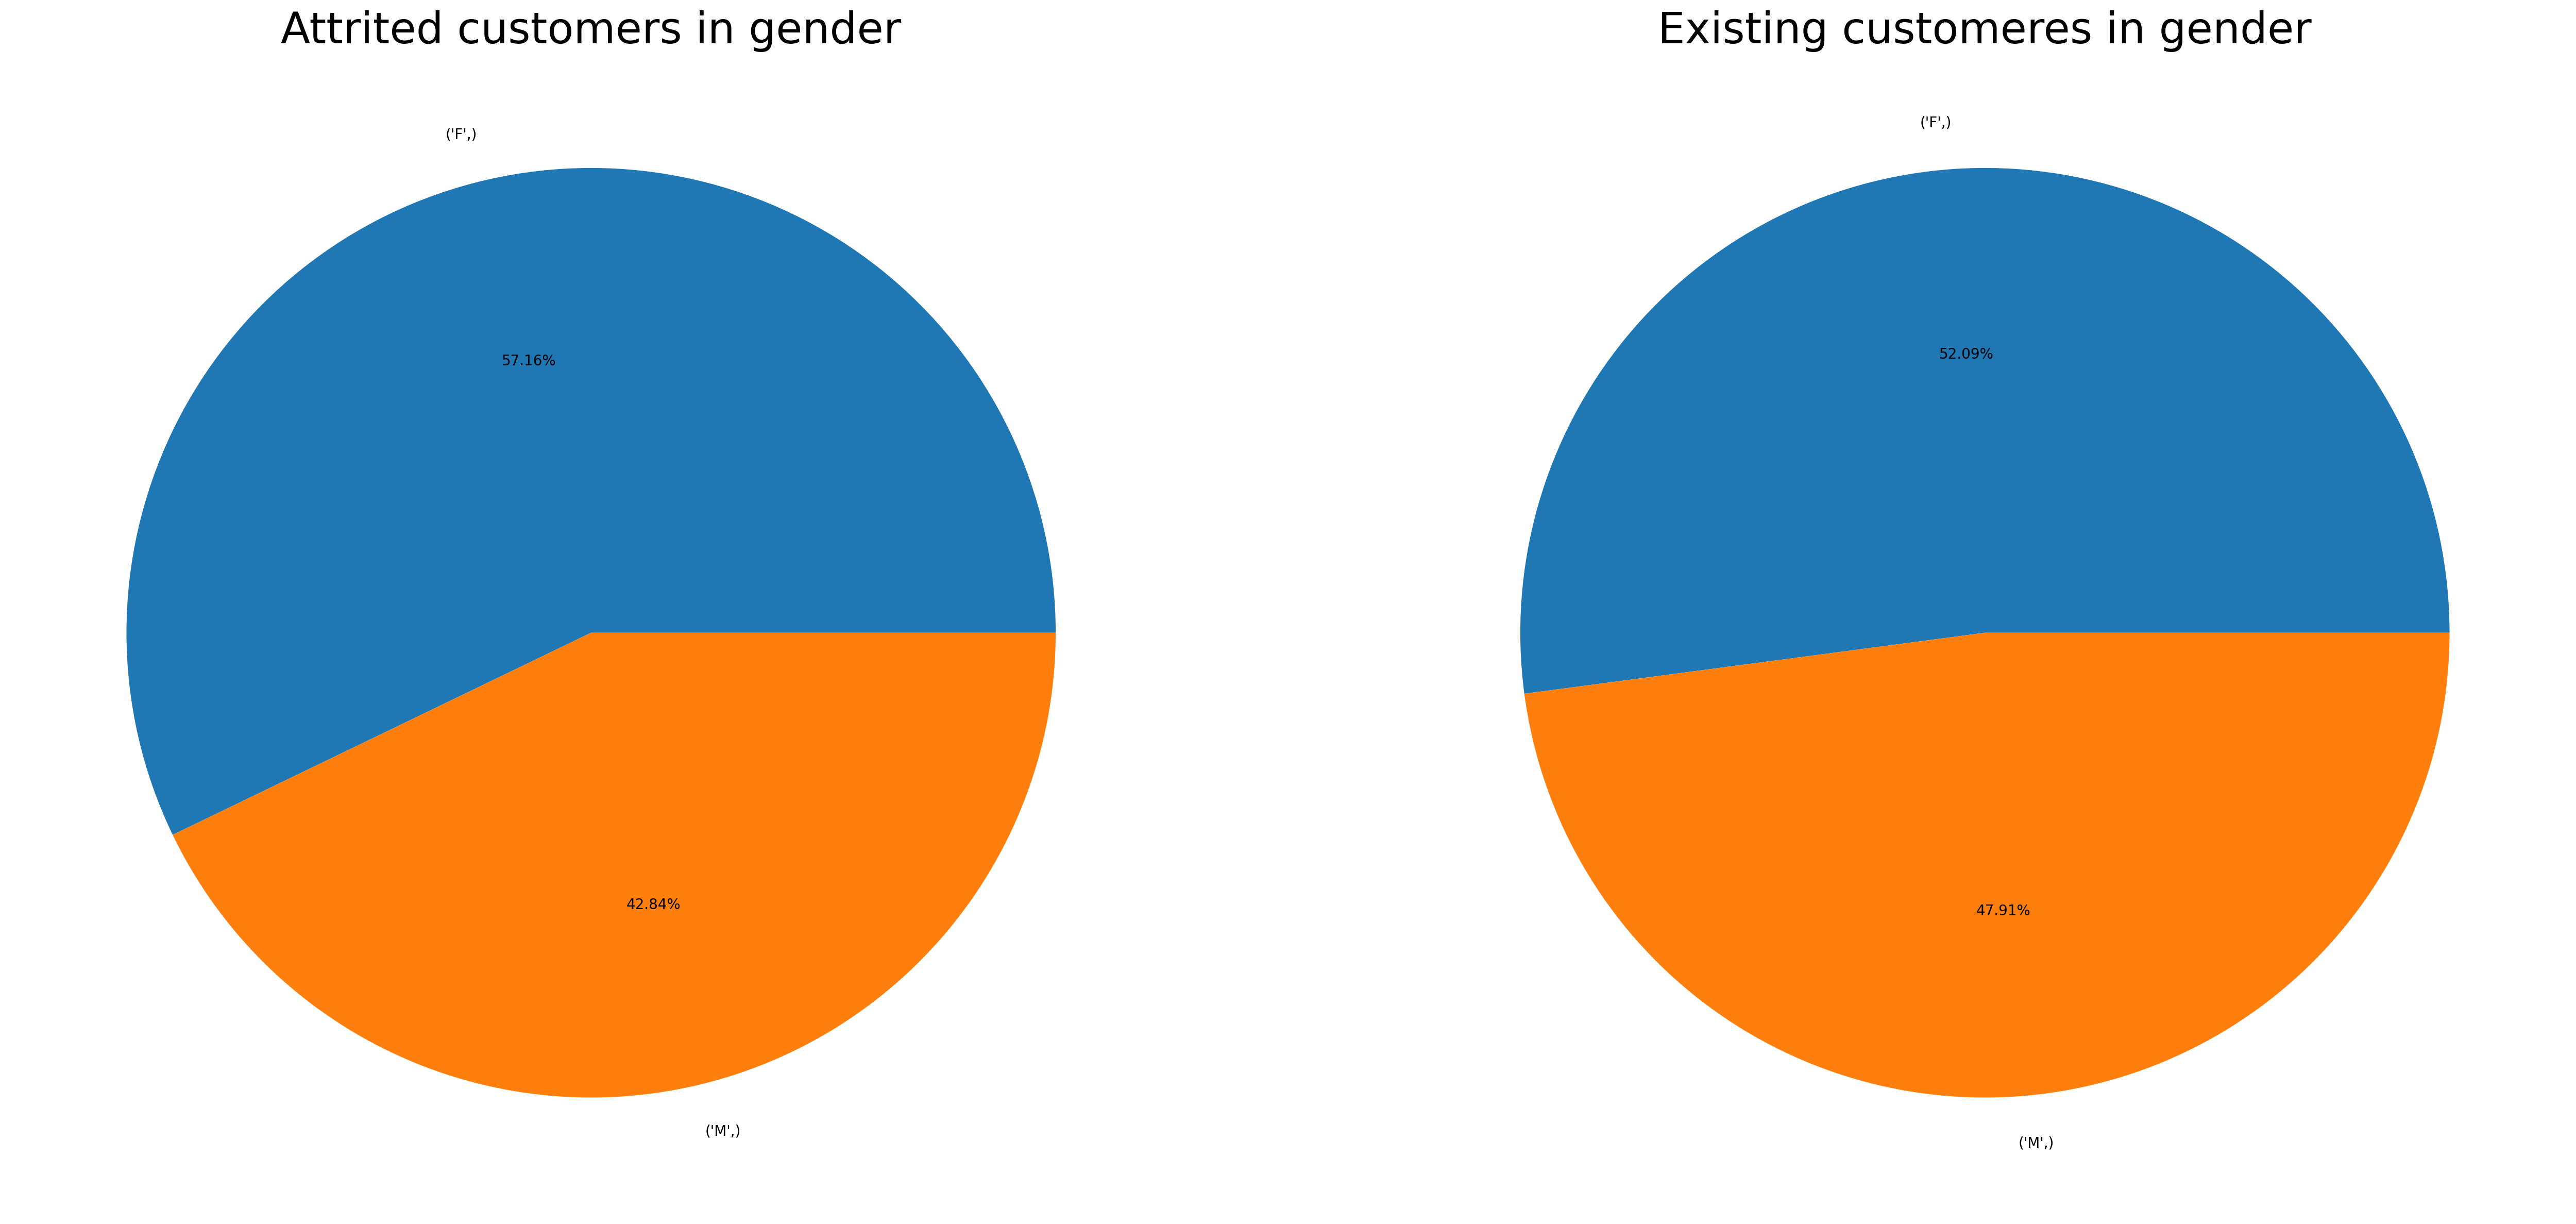

In [ ]:
gender_count = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts()
gender_attrited = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
gender_existing = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (32,18))
ax[0].set_title("Attrited customers in gender", fontsize = 30)
ax[0].pie(x = gender_attrited , autopct='%.2f%%', labels = gender_count.index)
ax[1].set_title("Existing customeres in gender", fontsize = 30)
ax[1].pie(x = gender_existing , autopct='%.2f%%', labels = gender_count.index)

In [ ]:
df.loc[df['Attrition_Flag'] == 'Attrited Customer', ['Attrition_Flag']] = 1
df.loc[df['Attrition_Flag']== 'Existing Customer', ['Attrition_Flag']] = 0
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

In [ ]:
#gender encoding
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
le_gender.classes_
#F = 0, M = 1

array(['F', 'M'], dtype=object)

In [ ]:
edu_encoder = LabelEncoder()
df['Education_Level'] = edu_encoder.fit_transform(df['Education_Level'])
edu_encoder.classes_
#college/0, doctorate/1, graduate/2, highschool/3, postgraduate/4, uneducated/5, unknown/6

array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown'], dtype=object)

In [ ]:
#convert unknown = 6 to nan value
df.loc[df['Education_Level'] == 6, ['Education_Level']] = np.nan

In [ ]:
df['Education_Level'].fillna(df['Education_Level'].mean(), inplace = True)

In [ ]:
marital_encoder = LabelEncoder()
df['Marital_Status'] = marital_encoder.fit_transform(df['Marital_Status'])
marital_encoder.classes_
#divorced/0, married/1, single/2, unknown/3

array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object)

In [ ]:
#convert unknown = 3 to nan
df.loc[df['Marital_Status']== 3, ['Marital_Status']] = np.nan
df['Marital_Status'].fillna(df['Marital_Status'].mean(),inplace = True)

In [ ]:
income_encoder = LabelEncoder()
df['Income_Category'] =  income_encoder.fit_transform(df['Income_Category'])
income_encoder.classes_
# 0/unknown(i already changed 0 to unknown), 120+/1, 30-40/2, 40-60/3, 60-80/4, 80-120/5

array(['0', '120 +', '30- 40', '40 - 60', '60 - 80', '80 - 120'],
      dtype=object)

In [ ]:
df.loc[df['Income_Category'] == 0, ['Income_Category']] = np.nan
df['Income_Category'].fillna(df['Income_Category'].median(), inplace = True)

In [ ]:
card_encoder = LabelEncoder()
df['Card_Category'] = card_encoder.fit_transform(df['Card_Category'])
card_encoder.classes_
#Blue/0, gold/1. platinum/2, silver/3

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

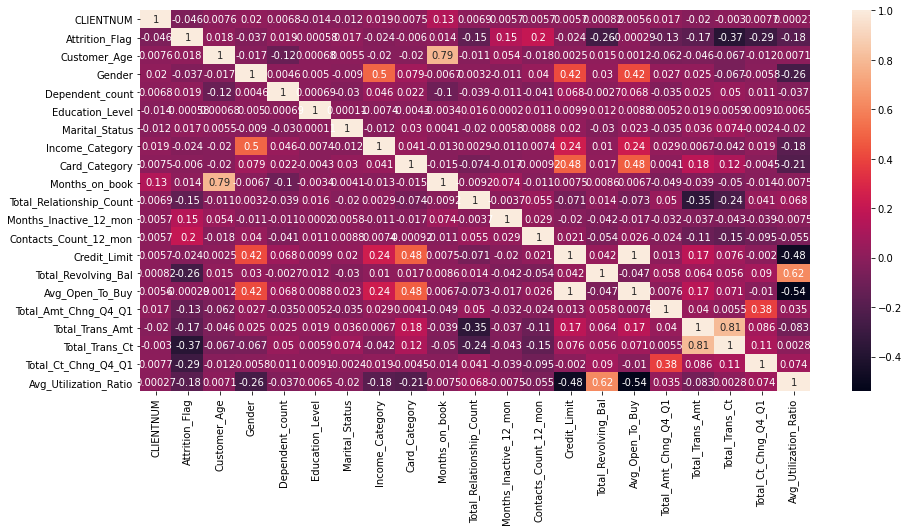

In [ ]:
#correlation matrix help you to find out which variables are correlated most and less.
cor = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(cor, annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns !='Attrition_Flag']
y = df.loc[:, df.columns =='Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = 0.3, shuffle = True)


In [ ]:
x_train.shape

(7088, 20)

In [ ]:
y_train.shape

(8101, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1),.ravel will convert that array shape to (n, )
yr_pred = lr.predict(x_test)
lr_score = accuracy_score(y_test, yr_pred)
confumat_lr = pd.DataFrame(confusion_matrix(y_test, yr_pred))
print(confumat_lr)
lr_score

      0  1
0  2517  0
1   522  0


0.8282329713721619

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random')
dt.fit(x_train, y_train)
yt_pred = dt.predict(x_test)
dt_score = accuracy_score(y_test, yt_pred)
confumat_dt = pd.DataFrame(confusion_matrix(y_test, yt_pred))
print(confumat_dt)
dt_score

      0    1
0  2399  118
1   139  383


0.9154327081276735

In [ ]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(DecisionTreeClassifier(), x, y)
cross_val

{'fit_time': array([0.08992219, 0.07866788, 0.0930953 , 0.09882617, 0.07194352]),
 'score_time': array([0.00198054, 0.00196862, 0.00188732, 0.00191355, 0.00183916]),
 'test_score': array([0.81934847, 0.8899309 , 0.94814815, 0.95407407, 0.85382716])}

In [ ]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(DecisionTreeClassifier(), x, y, cv = 5)
cross_score

array([0.8124383 , 0.89486673, 0.95209877, 0.95259259, 0.85382716])

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(x_train, y_train)
ysv_pred = svc.predict(x_test)
sv_score = accuracy_score(y_test, ysv_pred)
confumat_sv = pd.DataFrame(confusion_matrix(y_test, ysv_pred))
print(confumat_sv)
sv_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      0    1
0  2343  174
1   485   37


0.7831523527476143

In [ ]:
cross_score = cross_val_score(SVC(), x, y, cv = 5)
cross_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.83909181, 0.83909181, 0.83950617, 0.83950617, 0.83950617])

In [ ]:
cross_svc = cross_validate(SVC(), x, y)
cross_val

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'fit_time': array([0.08992219, 0.07866788, 0.0930953 , 0.09882617, 0.07194352]),
 'score_time': array([0.00198054, 0.00196862, 0.00188732, 0.00191355, 0.00183916]),
 'test_score': array([0.81934847, 0.8899309 , 0.94814815, 0.95407407, 0.85382716])}

In [ ]:
#DecisionTreeClassifier is a better model for prediction in that dataset.

In [ ]:
#change directory and cloning from github to colab.

In [ ]:
%cd /content/drive


/content/drive


In [ ]:
%cd MyDrive/ 

/content/drive/MyDrive


In [ ]:
%cd Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
!git clone https://github.com/Sinha123456/projects_jupyter.git

Cloning into 'projects_jupyter'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.
